# Handwritten Digit Recognition with MNIST Dataset
This notebook demonstrates the process of building and evaluating a neural network model for recognizing handwritten digits using the MNIST dataset. 


## Workflow
1. Import libraries 
2. Load the dataset.
3. Visualize the data.
4. Preprocess the data.
5. Build and compile the neural network.
6. Train the model.
7. Evaluate the model.
8. Visualize predictions.
9. Using CNN
10. Save model


### 1. Importing the required libraries 

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.datasets import mnist
from keras.callbacks import EarlyStopping



### 2. Load the Dataset

In [22]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print ("X_train.shape {}".format (X_train.shape))
print ("y_train.shape {}".format (y_train.shape))
print ("X_test.shape {}".format (X_test.shape))
print ("y_test.shape {}".format (y_test.shape))


X_train.shape (60000, 28, 28)
y_train.shape (60000,)
X_test.shape (10000, 28, 28)
y_test.shape (10000,)


### 3. Visualize the data.

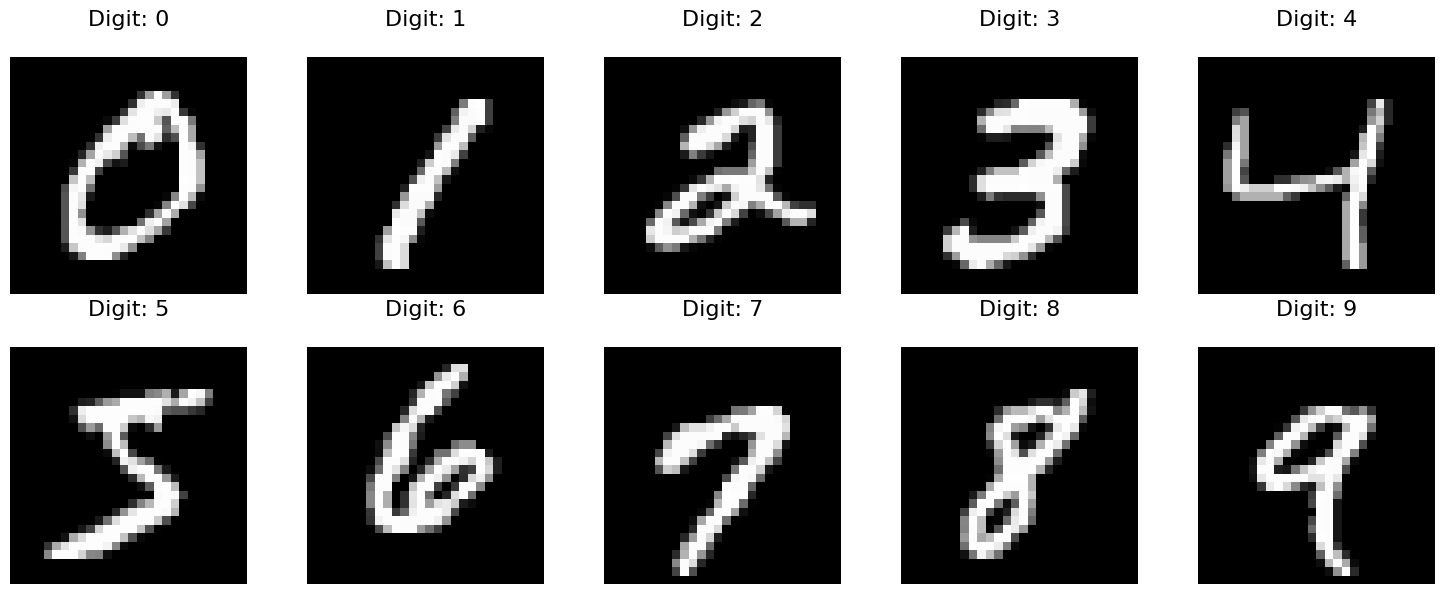

In [23]:
num_of_images = 10
rows = 2
columns = 5

if X_train.ndim == 2:  # Flattened, reshape to (num_samples, 28, 28)
    X_train_display = X_train.reshape(-1, 28, 28)
else:
    X_train_display = X_train  

# Create a figure with a grid of subplots
fig, axes = plt.subplots(rows, columns, figsize=(15, 6))

# Loop through the unique digits and display one sample for each
for i, ax in enumerate(axes.flat):
    if i < num_of_images:
        # Find the first sample of the digit `i`
        sample_index = np.where(y_train == i)[0][0]
        sample_image = X_train_display[sample_index]
        
        # Display the image
        ax.matshow(sample_image, cmap="gray")
        ax.set_title(f"Digit: {i}", fontsize=16)
        ax.axis("off")

plt.tight_layout()
plt.show()


### 4. Preprocess the data.

In [24]:
# Normalization 
X_train = X_train / 255
X_test = X_test / 255

### 5. Build and compile the neural network.

In [35]:
model = Sequential ([
    Flatten(input_shape= (28, 28,)), # # Flatten layer to prepare for Dense layers 
    Dense (100, activation = "relu"), # First Layer
    Dense (64, activation = "relu"), # Second layer
    Dropout (0.25), 
    Dense (10, activation = "softmax") # outer layer
])

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

/Users/motunrayoomolabi/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### 6. Train the model.

In [43]:
epochs = 20

model.fit (x = X_train, y=y_train ,epochs = epochs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 562us/step - accuracy: 0.9902 - loss: 0.0290
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 594us/step - accuracy: 0.9908 - loss: 0.0261
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 553us/step - accuracy: 0.9907 - loss: 0.0275
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 585us/step - accuracy: 0.9916 - loss: 0.0235
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 561us/step - accuracy: 0.9930 - loss: 0.0215
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 562us/step - accuracy: 0.9933 - loss: 0.0213
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 585us/step - accuracy: 0.9942 - loss: 0.0180
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 551us/step - accuracy: 0.9936 - loss: 0.0193
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 554us/step - accuracy: 0.9943 - loss: 0.0180
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 581us/step - accuracy: 0.9939 - loss: 0.0166
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 569us/step - accuracy: 0.9940 - loss: 0.0180
Epoch 12

### 7. Evaluate the model.

In [44]:
test_loss, test_accuracy = model.evaluate (X_test, y_test)

print ("Test Loss: {}, Test Accuracy: {}".format (test_loss, test_accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - accuracy: 0.9773 - loss: 0.1463
Test Loss: 0.13073010742664337, Test Accuracy: 0.9796000123023987


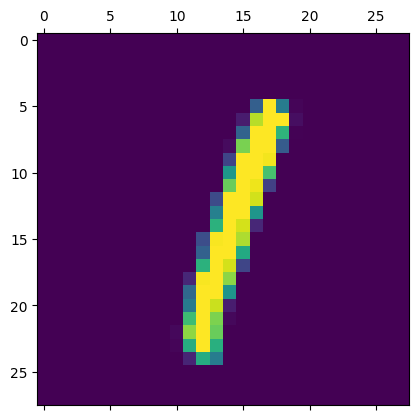

In [103]:
plt.matshow(X_test[5])
plt.show()

In [104]:
y_predicted = model.predict (X_test)

y_predicted[5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step


array([1.7235997e-29, 1.0000000e+00, 4.2170412e-28, 1.5251259e-38,
       5.9645874e-21, 1.0230720e-34, 4.7221987e-34, 1.4406029e-17,
       7.9003590e-18, 7.2419918e-23], dtype=float32)

In [106]:
np.argmax(y_predicted[5])

1

### 8. Visualize predictions.

In [48]:
y_predicted_labels = [np.argmax (i) for i in y_predicted]


In [49]:
cm = tf.math.confusion_matrix(labels = y_test, predictions= y_predicted_labels)

cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    1,    0,    2,    0,    0,    3,    0,    3,    0],
       [   1, 1121,    2,    3,    0,    1,    2,    1,    4,    0],
       [   5,    0, 1008,    4,    2,    0,    2,    4,    7,    0],
       [   0,    0,    3,  992,    0,    4,    0,    4,    1,    6],
       [   0,    1,    4,    1,  961,    0,    5,    2,    1,    7],
       [   3,    0,    0,   14,    1,  866,    3,    1,    3,    1],
       [   2,    2,    0,    1,    3,    3,  946,    0,    1,    0],
       [   2,    0,   12,    2,    0,    0,    0, 1004,    3,    5],
       [   4,    0,    2,    6,    1,    3,    0,    3,  953,    2],
       [   2,    2,    0,    7,    9,    3,    1,    3,    8,  974]],
      dtype=int32)>

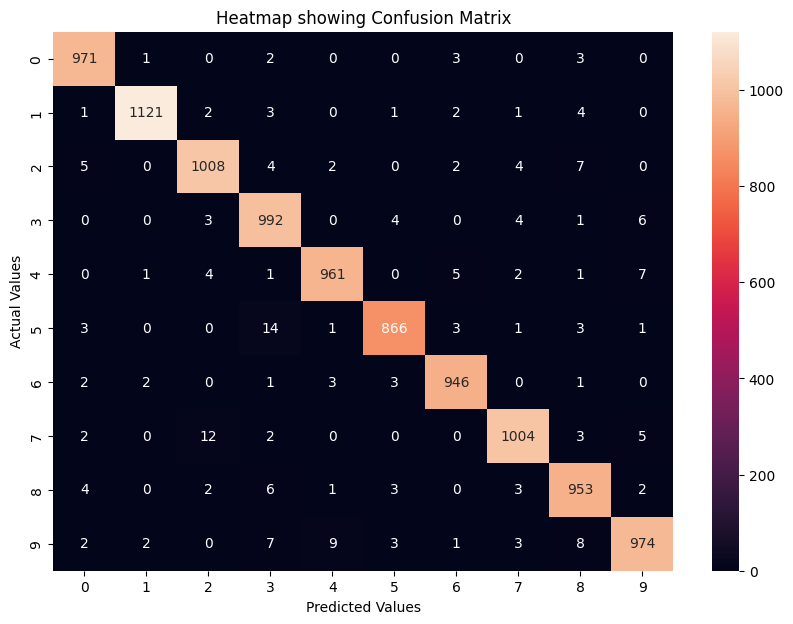

In [98]:
plt.figure (figsize = (10, 7))
sns.heatmap(cm, annot=True, fmt= "d")
plt.xlabel ("Predicted Values")
plt.ylabel ("Actual Values")
plt.title ("Heatmap showing Confusion Matrix")
plt.show()

In [15]:
model.save("digit_classifier_model.keras")

## Using CNN

### 9. Build and compile the convolutional neural network (CNN)

In [16]:
# Reshape Data to (28, 28, 1)
X_train_CNN = X_train.reshape(-1, 28, 28, 1)  
X_test_CNN = X_test.reshape(-1, 28, 28, 1)   


In [17]:
print (X_train_CNN.shape)
print (X_test_CNN.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [76]:
CNN_model = Sequential([
    # CNN layers
    Conv2D(filters=30, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),  # First Conv layer
    MaxPooling2D((2, 2)), 
    Dropout(0.25),  

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),  # Second Conv layer
    MaxPooling2D((2, 2)),
    Dropout(0.25),  
    
    # Dense layers
    Flatten(),  # Flatten layer to prepare for Dense layers
    Dense(64, activation='relu'),
    Dropout(0.5),  # Dropout before output layer
    Dense(10, activation='softmax')  # Output layer (10 classes)
])

# Compile the model
CNN_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [77]:
# Early Stopping stops the training when the model stops improving

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,  # Stop training after 5 epochs of no improvement
    restore_best_weights=True)

history = CNN_model.fit(
    X_train, y_train,
    validation_split=0.2,  # Use 20% of training data for validation
    epochs=10,
    batch_size=32,
    callbacks=[early_stopping]
)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7740 - loss: 0.6909 - val_accuracy: 0.9773 - val_loss: 0.0766
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9483 - loss: 0.1738 - val_accuracy: 0.9837 - val_loss: 0.0507
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9619 - loss: 0.1245 - val_accuracy: 0.9870 - val_loss: 0.0452
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9690 - loss: 0.1087 - val_accuracy: 0.9877 - val_loss: 0.0429
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9735 - loss: 0.0927 - val_accuracy: 0.9888 - val_loss: 0.0378


### 9. Evaluate the CNN model.

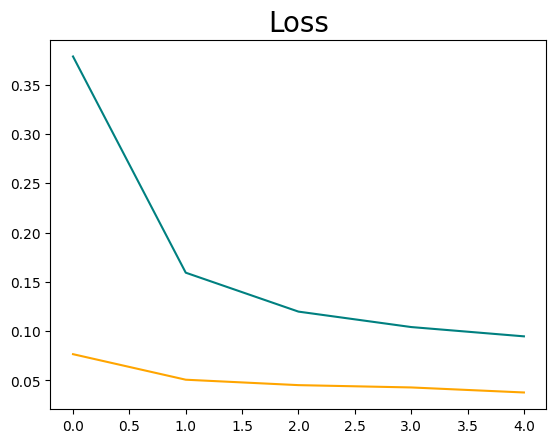

In [99]:
fig = plt.figure()
plt.plot(history.history["loss"], color = "teal", label = "loss")
plt.plot(history.history["val_loss"], color = "orange", label = "val_loss")
plt.title("Loss", fontsize = 20)
plt.show()


Text(0.5, 1.0, 'Accuracy')

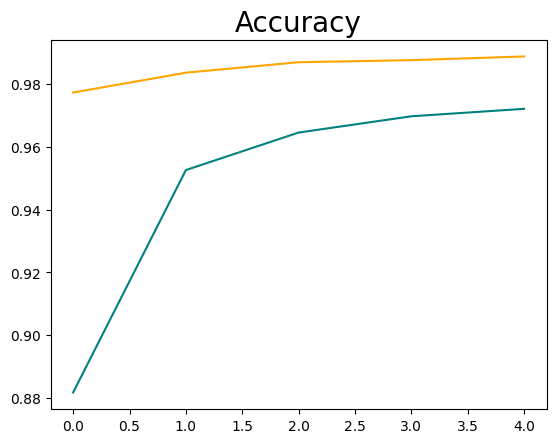

In [100]:
fig = plt.figure()
plt.plot(history.history["accuracy"], color = "teal", label = "accuracy")
plt.plot(history.history["val_accuracy"], color = "orange", label = "val_accuracy")
plt.title("Accuracy", fontsize = 20)

In [81]:
test_loss, test_accuracy = CNN_model.evaluate (X_test, y_test)

print ("Test Loss: {}, Test Accuracy: {}".format (test_loss, test_accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9869 - loss: 0.0415
Test Loss: 0.03479848429560661, Test Accuracy: 0.9886000156402588


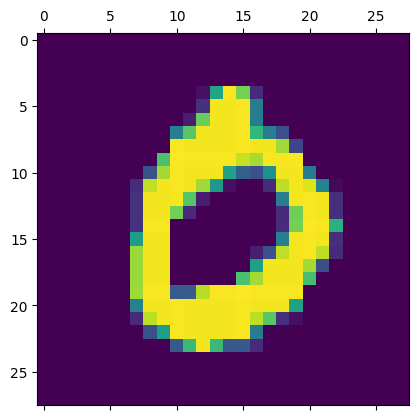

In [101]:
plt.matshow(X_test[3])
plt.show()

In [93]:
y_predicted_CNN = model.predict (X_test)

y_predicted_CNN[3]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step


array([1.0000000e+00, 1.4202504e-24, 4.3954311e-12, 1.2931542e-14,
       7.6504549e-19, 4.0269569e-19, 8.8566996e-17, 6.1436248e-14,
       7.1425172e-21, 2.7131890e-12], dtype=float32)

In [94]:
np.argmax(y_predicted_CNN[3])

0

### 10. Visualize CNN_model predictions.

In [85]:
y_predicted_labels_CNN = [np.argmax (i) for i in y_predicted_CNN]

In [86]:
cm_CNN = tf.math.confusion_matrix(labels = y_test, predictions= y_predicted_labels_CNN)

cm_CNN

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    1,    3,    2,    0,    0,    3,    1,    2,    2],
       [   0, 1124,    3,    2,    0,    0,    2,    1,    3,    0],
       [   1,    0, 1012,    2,    2,    0,    1,    2,   11,    1],
       [   0,    0,    6,  989,    0,    5,    0,    3,    3,    4],
       [   0,    0,    2,    0,  954,    0,    5,    3,    1,   17],
       [   0,    0,    0,   15,    1,  864,    3,    1,    5,    3],
       [   2,    2,    0,    1,    4,    5,  941,    0,    3,    0],
       [   2,    3,    7,    2,    0,    0,    0, 1004,    5,    5],
       [   0,    0,    1,    5,    3,    0,    0,    2,  957,    6],
       [   2,    2,    0,    0,    7,    3,    0,    5,    2,  988]],
      dtype=int32)>

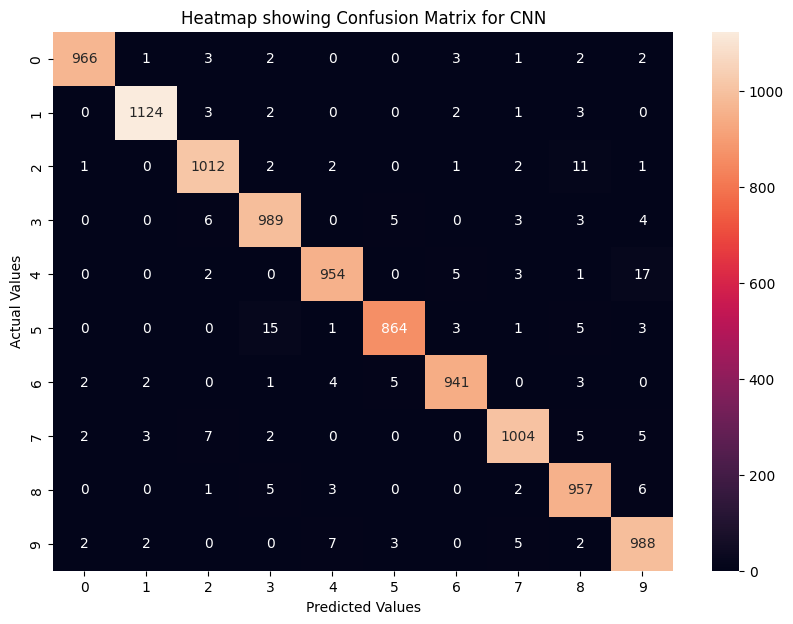

In [102]:
plt.figure (figsize = (10, 7))
sns.heatmap(cm_CNN, annot=True, fmt= "d")
plt.xlabel ("Predicted Values")
plt.ylabel ("Actual Values")
plt.title ("Heatmap showing Confusion Matrix for CNN")
plt.show()

### 11. Saving model

In [88]:
model.save("mnist_cnn_model.keras")


## Link to Streamlit Web App

https://mnistdigitclassifier.streamlit.app/
